In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

In [9]:
# Find the most recent date in the data set.
mostRecent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(mostRecent_date)

('2017-08-23',)


Text(0, 0.5, 'Inches')

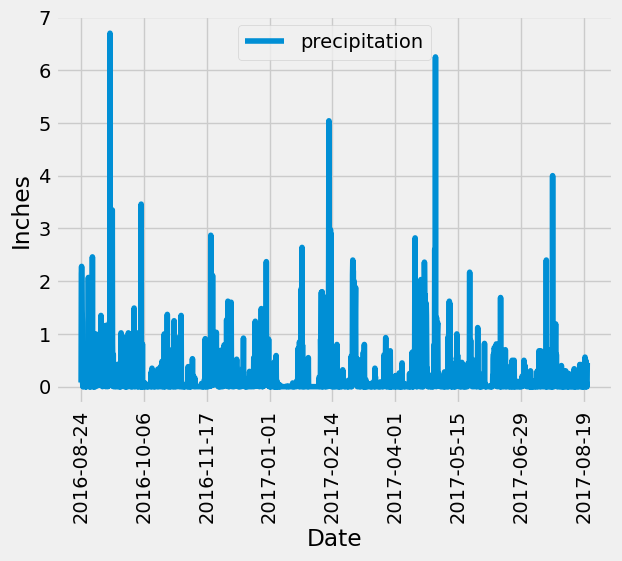

In [48]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
end_date = dt.datetime.strptime(mostRecent_date[0], '%Y-%m-%d')
# Calculate the date one year from the last date in data set.
start_date = end_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_scores = session.query(measurement.date, measurement.prcp).filter(measurement.date >= start_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_scores_df = pd.DataFrame(precip_scores).set_index('date')
precip_scores_df = precip_scores_df.rename(columns={'prcp':'precipitation'})

# Sort the dataframe by date
precip_scores_df = precip_scores_df.sort_values(by = 'date').dropna()


# Use Pandas Plotting with Matplotlib to plot the data
precip_scores_df.plot(rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_scores_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [27]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station.station).count()
print(f'There are {total_stations} total stations in the dataset.')


There are 9 total stations in the dataset.


In [31]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

mostActive_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
mostActive_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostActive_station_id = 'USC00519281'
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
              filter(measurement.station == mostActive_station_id).all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

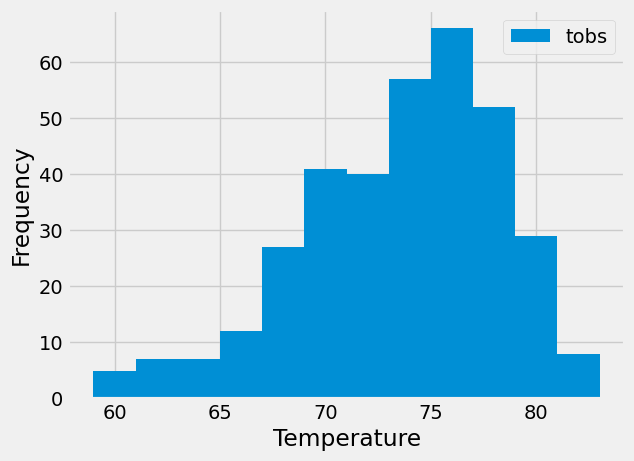

In [44]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
from pandas.plotting import table

mostActive_tobs = session.query(measurement.station, measurement.date, measurement.tobs).\
    filter(measurement.date >= start_date).\
    filter(measurement.station == mostActive_station_id).all()

#Convert to DataFrame
mostActive_tobs_df = pd.DataFrame(mostActive_tobs)

# plot histogram
mostActive_tobs_df.plot.hist(bins=12)

plt.xlabel("Temperature")

In [45]:
session.close()